## PROBLEM 4: SPORTS OR POLITICS

You have to design a classifier that reads a text document and classify it as Sport or Politics
using any of your favorite machine learning techniques. For feature representation you can
use: n-grams, TF-IDF, Bag of Words. You should compare atleast three ML Techniques for
this task. Write a detailed report (minimum 5 page) starting from how did you collected data
for this task, your dataset description and anlysis, techniques in brief and their quantative
comparisions, limitations of your system. You should submit a GitHub page with all details
for this problem.
Deliverable: Original Report and a GitHub Page.

Importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
import pprint

Data set Fetching

In [ ]:
# Fetch a dummy of dataset to see labels
newsgroups = fetch_20newsgroups(subset='all')

# Print the list of the 20 target newsgroup names
print("List of target names:")
pprint.pprint(list(newsgroups.target_names))

# Access the data and labels
print("\nFirst data point (text content):")
print(newsgroups.data[0])
print("\nFirst target label (integer index):")
print(newsgroups.target[0])
print("\nName of the first target label:")
print(newsgroups.target_names[newsgroups.target[0]])


List of target names:
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

First data point (text content):
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I tho

In [ ]:
def load_and_prep_data():
    # 1. Data Collection: Fetching the '20 Newsgroups' dataset, which is easily avialable.

    print("Downloading/Loading dataset...")
    # Defining the categories identified in above cell combining baseball/hockey into 'Sports' and guns/mideast/misc into 'Politics'
    categories = ['rec.sport.baseball', 'rec.sport.hockey','talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']

    # Load the data
    dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

    # Map the detailed labels to binary labels: 0 for Sport, 1 for Politics
    # Target names in dataset.target_names are sorted alphabetically, 0: rec.sport.baseball, 1: rec.sport.hockey, 2: talk.politics.guns, 3: talk.politics.mideast, 4: talk.politics.misc
    # So indices 0 and 1 are Sport, 2, 3, 4 are Politics.

    binary_labels = []
    for label in dataset.target:
        if dataset.target_names[label].startswith('rec.sport'):
            binary_labels.append('Sport')
        else:
            binary_labels.append('Politics')

    return dataset.data, binary_labels

Function to compare 5 ML models.

In [ ]:
def compare_models(X_train, X_test, y_train, y_test):
    # Defining the 3 Classifiers we want to compare
    classifiers = {
        "Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(max_iter=1050),
        "Linear SVM": LinearSVC(random_state=42, max_iter=1050),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
    }

    results = []

    print(f"\n{'='*60}")
    print(f"{'Algorithm':<20} | {'Accuracy':<10} | {'F1-Score':<10}")
    print(f"{'='*60}")

    for name, clf in classifiers.items():
        # Create a pipeline:
        # 1. Vectorize (Bag of Words) -> 2. Train Classifier
        text_clf = Pipeline([
            ('vect', CountVectorizer(stop_words='english', max_features=5000)),
            ('clf', clf),
        ])

        # Train
        text_clf.fit(X_train, y_train)

        # Predict
        predicted = text_clf.predict(X_test)

        # Calculate Metrics
        accuracy = metrics.accuracy_score(y_test, predicted)
        f1 = metrics.f1_score(y_test, predicted, pos_label='Politics')

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Report': metrics.classification_report(y_test, predicted)
        })

        print(f"{name:<20} | {accuracy:.4f}     | {f1:.4f}")

        # Confusion Matrix for the report
        cm = confusion_matrix(y_test,predicted, labels=['Sport', 'Politics'])
        print(f"Confusion Matrix:\n{cm}")

    return results



Creating the plot for the different ML models.

In [ ]:
def plot_results(results):
    # Generates a bar chart comparing the accuracy of the models.

    names = list(results.keys())
    values = list(results.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar(names, values,color=['red', 'blue', 'green'])

    plt.ylim(0.8, 1.0)
    plt.title('Comparison of ML Models: Sports vs. Politics Classification')
    plt.ylabel('Accuracy Score')

    # labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

    plt.savefig('model_comparison.png')
    print("\nComparison plot saved as 'model_comparison.png'")
    plt.show()

Downloading/Loading dataset...
Total documents: 4618
Example document snippet: From: jake@bony1.bony.com (Jake Livni)
Subject: Re: Happy Birthday Israel!
Organization: The Department of Redundancy Department
Lines: 20

In article <390@jcpltyo.JCPL.CO.JP> ohayon@jcpltyo.JCPL.CO.J...
Training set size: 3694
Test set size: 924

Algorithm            | Accuracy   | F1-Score  
Naive Bayes          | 0.9946     | 0.9954
Confusion Matrix:
[[374   1]
 [  4 545]]
Logistic Regression  | 0.9892     | 0.9908
Confusion Matrix:
[[373   2]
 [  8 541]]
Linear SVM           | 0.9913     | 0.9927
Confusion Matrix:
[[371   4]
 [  4 545]]
Random Forest        | 0.9892     | 0.9909
Confusion Matrix:
[[370   5]
 [  5 544]]
K-Nearest Neighbors  | 0.8593     | 0.8829
Confusion Matrix:
[[304  71]
 [ 59 490]]

Comparison plot saved as 'model_comparison.png'


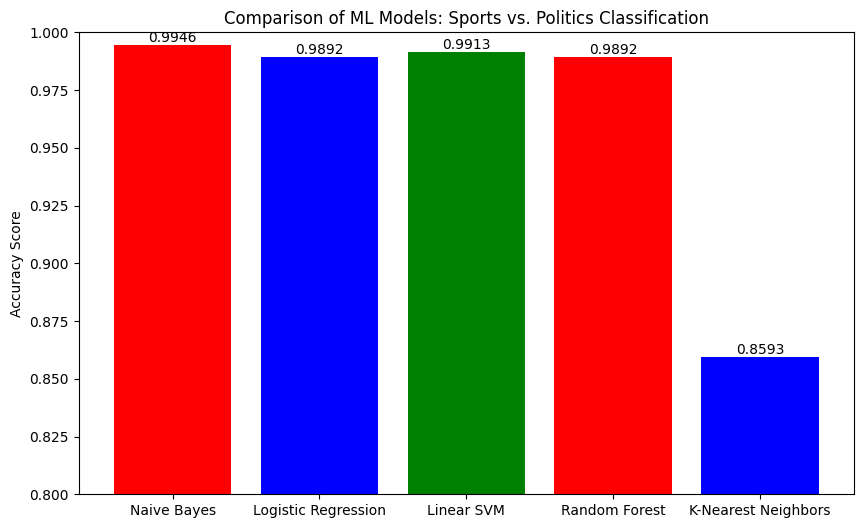


BEST MODEL: Naive Bayes
              precision    recall  f1-score   support

    Politics       1.00      0.99      1.00       549
       Sport       0.99      1.00      0.99       375

    accuracy                           0.99       924
   macro avg       0.99      1.00      0.99       924
weighted avg       0.99      0.99      0.99       924


Comparison saved to 'model_comparison_results.csv'


In [ ]:
def main():
    # 1. Get Data
    texts, labels = load_and_prep_data()
    print(f"Total documents: {len(texts)}")
    print(f"Example document snippet: {texts[0][:200]}...")

    # 2. Split Data (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    # 3. Compare Models
    results_list = compare_models(X_train, X_test, y_train, y_test)

    # Convert the list of dictionaries to a dictionary of model_name: accuracy_score
    results_dict = {item['Model']: item['Accuracy'] for item in results_list}

    # 4. Visualize
    plot_results(results_dict)

    # Detailed Report for the Best Model
    best_model = max(results_list, key=lambda x: x['Accuracy'])
    print(f"\n{'='*60}")
    print(f"BEST MODEL: {best_model['Model']}")
    print(f"{'='*60}")
    print(best_model['Report'])
    # Save results to CSV for your GitHub report
    df = pd.DataFrame(results_list).drop(columns=['Report'])
    df.to_csv("model_comparison_results.csv", index=False)
    print("\nComparison saved to 'model_comparison_results.csv'")

if __name__ == "__main__":
    main()